# SSNMF Methods

In [1]:
import numpy as np
from numpy import linalg as la

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.io import loadmat

In [2]:
#multiplicative updates for NMF, for input X of size m x n, outputs A of size m x k and S of size k x n so that X ~ AS
#for approximately minimizing ||X - AS||_F^2
#input: numpy array X, integer number of topics k
#optional input: numpy array A (initialization), numpy array S (initialization), integer numiters, boolean saveerrs
#output: numpy array A, numpy array S
#optional output: numpy array errs
def nmfmult(X,k,**kwargs):
    rows,cols = np.shape(X)
    
    #get optional arguments or set to default
    A = kwargs.get('A', np.random.rand(rows,k))
    S = kwargs.get('S', np.random.rand(k,cols))
    numiters = kwargs.get('numiters', 10)
    saveerrs = kwargs.get('saveerrs', False)
    
    
    if saveerrs:
        errs = np.empty(numiters) #initialize error array 
    
    for i in range(numiters):
        #multiplicative updates for A and S
        A = np.multiply(np.divide(A,A @ S @ np.transpose(S)), X @ np.transpose(S))
        S = np.multiply(np.divide(S,np.transpose(A) @ A @ S), np.transpose(A) @ X)
        
        if saveerrs:
            errs[i] = la.norm(X - A @ S, 'fro') #save reconstruction error
        
    if saveerrs:
        return A,S,errs
    else:
        return A,S

In [3]:
#multiplicative updates for supervised NMF (SNMF), for inputs X of size m x n and Y of size p x n, outputs A 
#of size m x k, S of size k x n, and B of size p x n so that X ~ AS and Y ~ BS for approximately minimizing 
#||X - AS||_F^2 + \lambda*||Y - BS||_F^2
#input: numpy array X, numpy array Y, integer number of topics k
#optional input: numpy array A (initialization), numpy array S (initialization), numpy array B (initialization), 
#scalar classification weight lam, integer numiters, boolean saveerrs
#output: numpy array A, numpy array B, numpy array S
#optional output: numpy array errs, numpy array reconerrs, numpy array classerrs
def snmfmult(X,Y,k,**kwargs):
    rows,cols = np.shape(X)
    classes,Ycols = np.shape(Y)
    
    #get optional arguments or set to default
    A = kwargs.get('A', np.random.rand(rows,k))
    S = kwargs.get('S', np.random.rand(k,cols))
    B = kwargs.get('B', np.random.rand(classes,k))
    lam = kwargs.get('lam', 1)
    numiters = kwargs.get('numiters', 10)
    saveerrs = kwargs.get('saveerrs', False)
    
    
    if saveerrs:
        errs = np.empty(numiters) #initialize error array
        reconerrs = np.empty(numiters)
        classerrs = np.empty(numiters)
    
    for i in range(numiters):
        #multiplicative updates for A, S, and B
        A = np.multiply(np.divide(A,A @ S @ np.transpose(S)), X @ np.transpose(S))
        B = np.multiply(np.divide(B, B @ S @ np.transpose(S)), Y @ np.transpose(S))
        S = np.multiply(np.divide(S, np.transpose(A) @ A @ S + lam * np.transpose(B) @ B @ S), 
                        np.transpose(A) @ X + lam * np.transpose(B) @ Y)
        
        if saveerrs:
            errs[i] = la.norm(X - A @ S, 'fro') + lam * la.norm(Y - B @ S, 'fro') #save errors
            reconerrs[i] = la.norm(X - A @ S, 'fro') 
            classerrs[i] = la.norm(Y - B @ S, 'fro')
        
    if saveerrs:
        return A,B,S,errs,reconerrs,classerrs
    else:
        return A,B,S

In [24]:
#multiplicative updates for Kullback-Liebler supervised NMF (KLSNMF), for inputs X of size m x n and Y of size p x n, 
#outputs A of size m x k, S of size k x n, and B of size p x n so that X ~ AS and Y ~ BS for approximately minimizing 
#||X - AS||_F^2 + \lambda*D(Y||BS)
#input: numpy array X, numpy array Y, integer number of topics k
#optional input: numpy array A (initialization), numpy array S (initialization), numpy array B (initialization), 
#scalar classification weight lam, integer numiters, boolean saveerrs
#output: numpy array A, numpy array B, numpy array S
#optional output: numpy array errs, numpy array reconerrs, numpy array classerrs
def klsnmfmult(X,Y,k,**kwargs):
    rows,cols = np.shape(X)
    classes,Ycols = np.shape(Y)
    
    #get optional arguments or set to default
    A = kwargs.get('A', np.random.rand(rows,k))
    S = kwargs.get('S', np.random.rand(k,cols))
    B = kwargs.get('B', np.random.rand(classes,k))
    lam = kwargs.get('lam', 1)
    numiters = kwargs.get('numiters', 10)
    saveerrs = kwargs.get('saveerrs', False)
    
    
    if saveerrs:
        errs = np.empty(numiters) #initialize error array
        reconerrs = np.empty(numiters)
        classerrs = np.empty(numiters)
    
    for i in range(numiters):
        #multiplicative updates for A, S, and B
        A = np.multiply(np.divide(A,A @ S @ np.transpose(S)), X @ np.transpose(S))
        B = np.multiply(np.divide(B,np.ones((classes,cols)) @ np.transpose(S)), np.divide(Y, B @ S) @ np.transpose(S))
        S = np.multiply(np.divide(S, 2 * np.transpose(A) @ A @ S + lam * np.transpose(B) @ np.ones((classes,cols))),
                       2 * np.transpose(A) @ X + lam * np.transpose(B) @ np.divide(Y, B @ S)) 
        
        if saveerrs:
            errs[i] = la.norm(X - A @ S, 'fro') + lam * la.norm(Y - B @ S, 'fro') #save errors
            reconerrs[i] = la.norm(X - A @ S, 'fro') 
            classerrs[i] = la.norm(Y - B @ S, 'fro')
        
    if saveerrs:
        return A,B,S,errs,reconerrs,classerrs
    else:
        return A,B,S

In [34]:
# THERE ARE ERRORS

#multiplicative updates for l1 supervised NMF (l1SNMF), for inputs X of size m x n and Y of size p x n, 
#outputs A of size m x k, S of size k x n, and B of size p x n so that X ~ AS and Y ~ BS for approximately minimizing 
#||X - AS||_F^2 + \lambda*||Y-BS||_1 + \alpha*||B||_1
#input: numpy array X, numpy array Y, integer number of topics k
#optional input: numpy array A (initialization), numpy array S (initialization), numpy array B (initialization), 
#scalar classification weight lam, scalar weight alpha, integer numiters, boolean saveerrs
#output: numpy array A, numpy array B, numpy array S
#optional output: numpy array errs, numpy array reconerrs, numpy array classerrs
def l1snmfmult(X,Y,k,**kwargs):
    rows,cols = np.shape(X)
    classes,Ycols = np.shape(Y)
    
    #get optional arguments or set to default
    A = kwargs.get('A', np.random.rand(rows,k))
    S = kwargs.get('S', np.random.rand(k,cols))
    B = kwargs.get('B', np.random.rand(classes,k))
    lam = kwargs.get('lam', 1)
    alpha = kwargs.get('alpha',1)
    numiters = kwargs.get('numiters', 10)
    saveerrs = kwargs.get('saveerrs', False)
    
    
    if saveerrs:
        errs = np.empty(numiters) #initialize error array
        reconerrs = np.empty(numiters)
        classerrs = np.empty(numiters)
    
    for i in range(numiters):
        #multiplicative updates for A, S, and B
        A = np.multiply(np.divide(A,A @ S @ np.transpose(S)), X @ np.transpose(S))
        B = (lam/alpha) * np.multiply(B, np.sign(Y - B @ S) @ np.transpose(S))
        S = np.multiply(np.divide(S, 2 * np.transpose(A) @ A @ S), 
                        2 * np.transpose(A) @ X + lam * np.transpose(B) @ np.sign(Y - B @ S))
        
        if saveerrs:
            errs[i] = la.norm(X - A @ S, 'fro') + lam * la.norm(Y - B @ S, 'fro') #save errors
            reconerrs[i] = la.norm(X - A @ S, 'fro') 
            classerrs[i] = la.norm(Y - B @ S, 'fro')
        
    if saveerrs:
        return A,B,S,errs,reconerrs,classerrs
    else:
        return A,B,S

## Testing

In [17]:
numIters = 1500
A,S,errs = nmfmult(np.random.rand(100,100),5,
                   numiters = numIters, saveerrs = True)

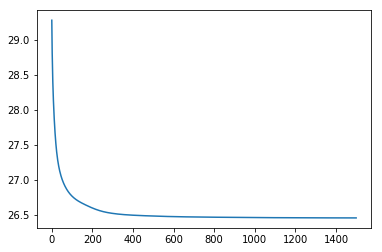

In [18]:
plt.plot(range(numIters),errs)

In [ ]:
data = loadmat('btstrpCOVID.mat')

In [ ]:
numIters = 15
A,S,errs = nmfmult(data['btstrpimagemat'],10,numiters = numIters, saveerrs = True)

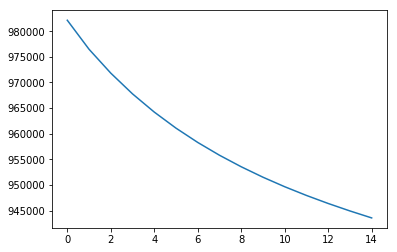

In [ ]:
plt.plot(range(numIters),errs)

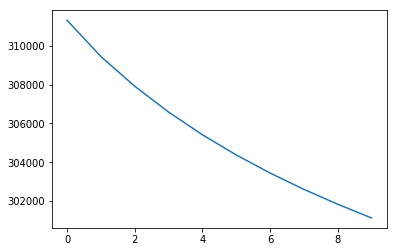

In [7]:
data = loadmat('btstrpCOVID300.mat')
numIters = 10
A,S,errs = nmfmult(data['btstrpimagemat'],10,numiters = numIters, saveerrs = True)
plt.plot(range(numIters),errs)

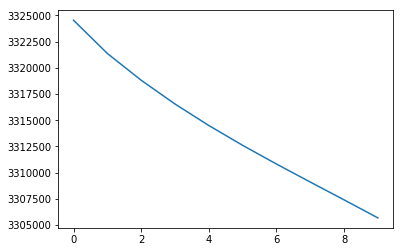

In [19]:
numIters = 10
A,B,S,errs,reconerrs,classerrs = snmfmult(data['btstrpimagemat'],data['btstrplabelmat'],10,numiters = numIters, saveerrs = True,lam=100000)
plt.plot(range(numIters),errs)

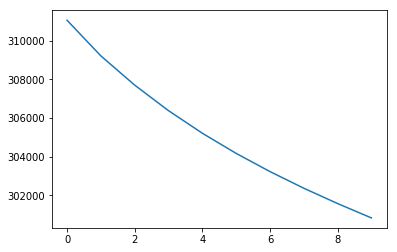

In [20]:
plt.plot(range(numIters),reconerrs)

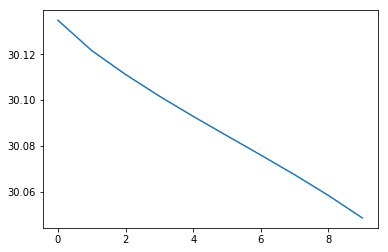

In [21]:
plt.plot(range(numIters),classerrs)

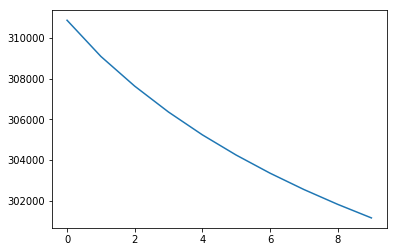

In [25]:
numIters = 10
A,B,S,errs,reconerrs,classerrs = klsnmfmult(data['btstrpimagemat'],data['btstrplabelmat'],10,numiters = numIters, saveerrs = True)
plt.plot(range(numIters),errs)

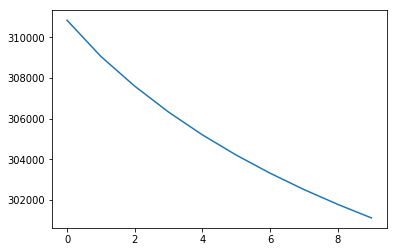

In [26]:
plt.plot(range(numIters),reconerrs)

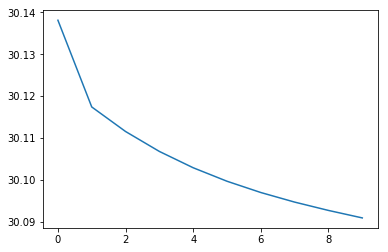

In [27]:
plt.plot(range(numIters),classerrs)

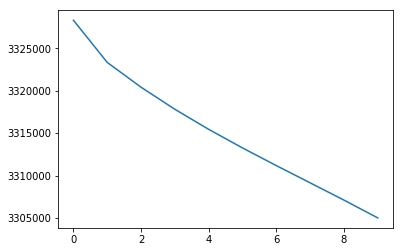

In [28]:
numIters = 10
A,B,S,errs,reconerrs,classerrs = klsnmfmult(data['btstrpimagemat'],data['btstrplabelmat'],10,numiters = numIters, saveerrs = True,lam=100000)
plt.plot(range(numIters),errs)

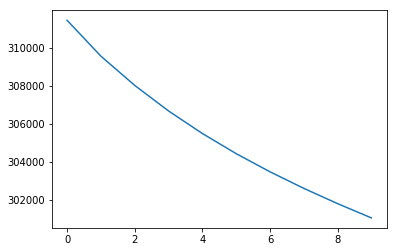

In [29]:
plt.plot(range(numIters),reconerrs)

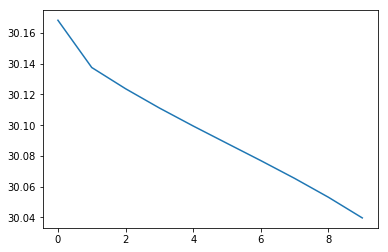

In [30]:
plt.plot(range(numIters),classerrs)

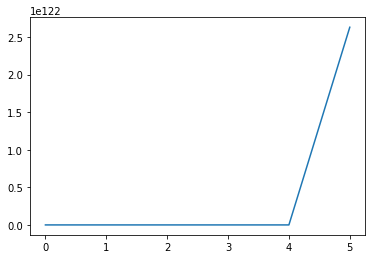

In [36]:
numIters = 10
A,B,S,errs,reconerrs,classerrs = l1snmfmult(data['btstrpimagemat'],data['btstrplabelmat'],10,numiters = numIters, saveerrs = True)
plt.plot(range(numIters),errs)

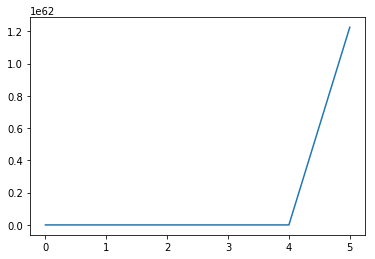

In [37]:
plt.plot(range(numIters),reconerrs)

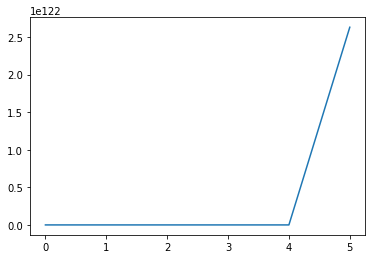

In [38]:
plt.plot(range(numIters),classerrs)